In [21]:
using Distributions, Plots, Statistics, Images, CSV, DataFrames

In [2]:
df = DataFrame(CSV.File(open("./AAPL.csv"); buffer_in_memory=true))

Row,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2000-01-03,0.936384,1.00446,0.907924,0.999442,0.848323,535796800
2,2000-01-04,0.966518,0.987723,0.90346,0.915179,0.776801,512377600
3,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.788168,778321600
4,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719961,767972800
5,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.754065,460734400
6,2000-01-10,0.910714,0.912946,0.845982,0.872768,0.740803,505064000
7,2000-01-11,0.856585,0.887277,0.808036,0.828125,0.70291,441548800
8,2000-01-12,0.848214,0.852679,0.772321,0.77846,0.660754,976068800
9,2000-01-13,0.84361,0.881696,0.825893,0.863839,0.733223,1032684800


In [38]:
v = df.Open;

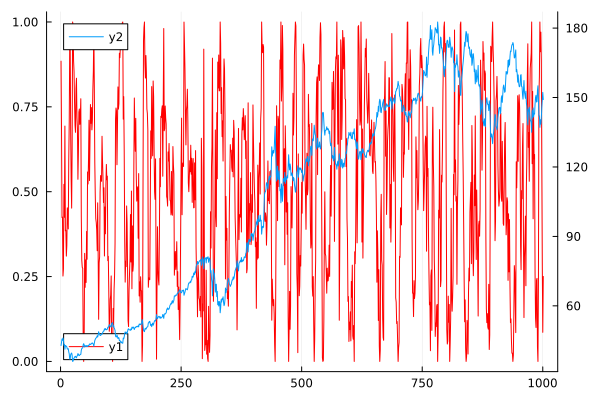

In [49]:
window = 30
op_cost = []
p_n = 1000
windowed_interval = window:(length(v) - window)
i_v = v[windowed_interval]
α = .1
for i in windowed_interval
    interval = v[i-(window ÷ 2):i+(window ÷ 2)]
    
    ma = maximum(interval)
    mi = minimum(interval)
    x = v[i]

    σ = std(interval)
    μ = mean(interval)
    d = Cauchy(μ, σ)
    
    z_ma = cdf(d, ma)
    z_mi = cdf(d, mi)
    z_x = cdf(d, x)
    push!(op_cost, (z_ma - z_x) / (z_ma - z_mi))
end
plot(op_cost[end - p_n:end], color = :red)
plot!(twinx(), i_v[end - p_n:end])

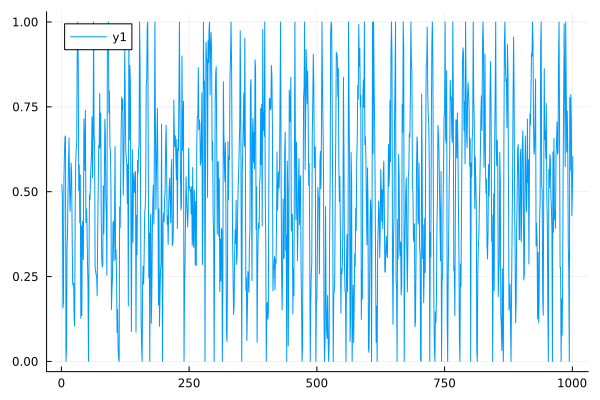

In [28]:
plot(op_cost[end - 1000:end])